### Loading libraries

In [1]:
import sys
import os
sys.path.insert(1, '..')
os.chdir('..')
import matplotlib.pyplot as plt
from data_formatters.hall import *
from dataset import TSDataset
from conf import Conf

### Code walk-through

The major parts of the code that need to be defined for each data set are:
1. config file in `.yaml` format,
2. data formatter script.

For now, you can study the `electricity.yaml` example for a look of what a config file should feel like. You can skip the hyperparam defintions and the model parameters. The main focus would be on defining the dataset parameters. 

We do not intereact with `.yaml` in a direct way but instead though `Conf` class, which handles the following:
1. defines some defaults if not specified in `.yaml`,
2. sets save paths,
3. allows for nice colored printing.

Technically, we could doo all of this in the `.yaml` file directly. However, then every time we re-run the experiment, we would have to manually modify the `.yaml` file to reset save paths and redefine some variables, which would be inconvenient.  


In [2]:
# loading the config file, setting the experiment name, and the seed for random pre-processing parts (like splitting)
cnf = Conf(conf_file_path='./conf/hall.yaml', seed=15, exp_name="test", log=False)

In [3]:
# lets print out the config file
print(f'\nDefault configuration parameters: \n{cnf}')


Default configuration parameters: 
LR: 0.001
EPOCHS: 20
N_WORKERS: 0
BATCH_SIZE: 64
QUANTILES: [0.1, 0.5, 0.9]
DS_NAME: hall
ALL_PARAMS: {'ds_name': 'hall', 'data_csv_path': './raw_data/Hall2018_processed_akhil.csv', 'index_col': -1, 'total_time_steps': 192, 'num_encoder_steps': 168, 'max_samples': 0, 'batch_size': 64, 'device': 'cuda', 'lr': 0.001, 'num_epochs': 20, 'n_workers': 0, 'model': 'transformer', 'loader': 'base', 'quantiles': [0.1, 0.5, 0.9], 'batch_first': True, 'early_stopping_patience': 5, 'hidden_layer_size': 160, 'stack_size': 1, 'dropout_rate': 0.1, 'max_gradient_norm': 0.01, 'num_heads': 4, 'd_model': 64, 'q': 16, 'v': 16, 'h': 4, 'N': 2, 'attention_size': 0, 'dropout': 0.1, 'pe': 'original', 'chunk_mode': 'None', 'd_input': 5, 'd_output': 3}
EXP_LOG_PATH: ./log\transformer\test\11/11/2022.00:12:01
DEVICE: cuda


Now let's move on to the data formatter. This is the part that should handle:
1. loading the data and setting types,
2. splitting the data into train / val / test sets,
3. setting scalers and encoders for numerical / categorical variables resp.

We are going to leave parts 2-3 for the future exploration. Now, let's focus on loading and settting the types for the data. 

In [4]:
#df['gl'] = pd.to_numeric(df['gl'], errors='coerce')

In [5]:
# Calling data formatter
data_formatter = HALLFormatter(cnf)

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data['segment'] = (lag > gap_threshold).cumsum()
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  id_data.sort_values(time_col, inplace=True)
C:\Users\Akhil\Desktop\undergrad\Texas A&M\Academics\Fall 2022\research Stat\GluNet\data_formatters\utils.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Dropped segments: 89
Extracted segments: 192


In [6]:
data_formatter.data.head(10)
#dt.day of the week, dt.month of the year to split time to different columns

,time,id,gl,segment,id_segment,year,month,day,hour,minute
0,2014-02-03 03:40:00,0,93.0,0.0,1636-69-001_0.0,2014,2,3,3,40
1,2014-02-03 03:45:00,0,93.0,0.0,1636-69-001_0.0,2014,2,3,3,45
2,2014-02-03 03:50:00,0,93.0,0.0,1636-69-001_0.0,2014,2,3,3,50
3,2014-02-03 03:55:00,0,95.0,0.0,1636-69-001_0.0,2014,2,3,3,55
4,2014-02-03 04:00:00,0,96.0,0.0,1636-69-001_0.0,2014,2,3,4,0
5,2014-02-03 04:05:00,0,95.0,0.0,1636-69-001_0.0,2014,2,3,4,5
6,2014-02-03 04:10:00,0,95.0,0.0,1636-69-001_0.0,2014,2,3,4,10
7,2014-02-03 04:15:00,0,95.0,0.0,1636-69-001_0.0,2014,2,3,4,15
8,2014-02-03 04:20:00,0,96.0,0.0,1636-69-001_0.0,2014,2,3,4,20
9,2014-02-03 04:25:00,0,97.0,0.0,1636-69-001_0.0,2014,2,3,4,25


Finally, let's work with the `TSDataset` class. This is the main part of the code as it aligns all of our previous steps. In the end, it is the `TSDataset` that is going to call the splitters, scalers, and encoders. **Importatnly** the model is only going to interact with the data through this class. 

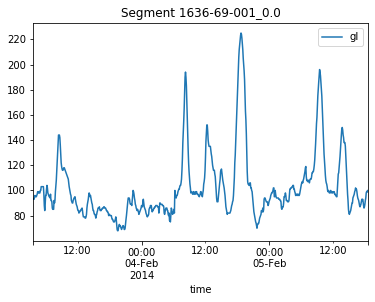

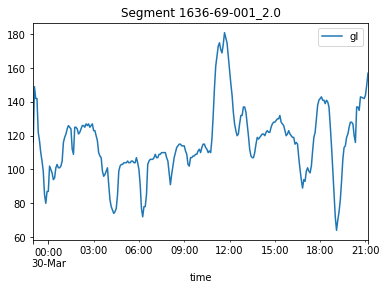

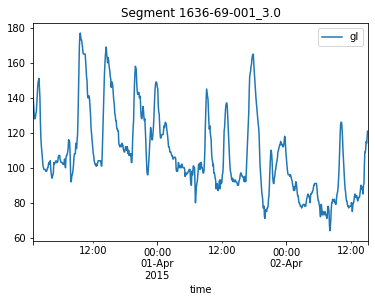

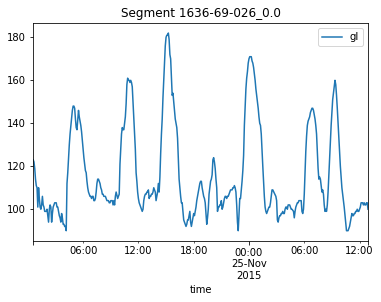

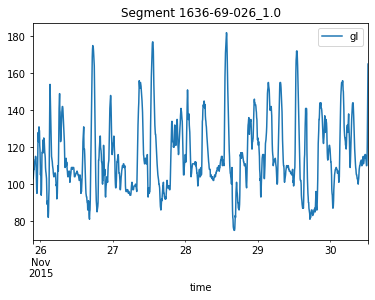

In [7]:
# plot the data inside the data formatter
counter = 0
for id_segment, df in data_formatter.data.groupby('id_segment'):
    df.plot(x='time', y='gl', title=f'Segment {id_segment}')
    plt.show()
    counter += 1
    if(counter == 5): break

In [8]:
# let's see train, val, and test numbers
print(f'Train / val / test indices: {len(data_formatter.train_idx)}, {len(data_formatter.val_idx)}, {len(data_formatter.test_idx)}')
# let's see proprtions
print(f'Train / val / test proportions: {len(data_formatter.train_idx) / len(data_formatter.data)}, {len(data_formatter.val_idx) / len(data_formatter.data)}, {len(data_formatter.test_idx) / len(data_formatter.data)}')

Train / val / test indices: 59509, 16320, 20783
Train / val / test proportions: 0.5838165033208739, 0.16010830856167407, 0.20389282946306816


In [9]:
# we are going to pass our data formatter and the config file to the TSDataset class
train_dataset =  TSDataset(cnf, data_formatter, data_formatter.train_data)
val_dataset =  TSDataset(cnf, data_formatter, data_formatter.val_data)
test_dataset =  TSDataset(cnf, data_formatter, data_formatter.test_data)

Getting valid sampling locations.
# available segments=33915
Extracting all available segments.
1000 of 33915 samples done...
2000 of 33915 samples done...
3000 of 33915 samples done...
4000 of 33915 samples done...
5000 of 33915 samples done...
6000 of 33915 samples done...
7000 of 33915 samples done...
8000 of 33915 samples done...
9000 of 33915 samples done...
10000 of 33915 samples done...
11000 of 33915 samples done...
12000 of 33915 samples done...
13000 of 33915 samples done...
14000 of 33915 samples done...
15000 of 33915 samples done...
16000 of 33915 samples done...
17000 of 33915 samples done...
18000 of 33915 samples done...
19000 of 33915 samples done...
20000 of 33915 samples done...
21000 of 33915 samples done...
22000 of 33915 samples done...
23000 of 33915 samples done...
24000 of 33915 samples done...
25000 of 33915 samples done...
26000 of 33915 samples done...
27000 of 33915 samples done...
28000 of 33915 samples done...
29000 of 33915 samples done...
30000 of 33915

In [10]:
#print(train_dataset[1,5])
#print(train_dataset[6,5])

Example #0: x.shape=(192, 6), y.shape=(24, 1)
Example #1: x.shape=(192, 6), y.shape=(24, 1)
Example #2: x.shape=(192, 6), y.shape=(24, 1)
Example #3: x.shape=(192, 6), y.shape=(24, 1)
Example #4: x.shape=(192, 6), y.shape=(24, 1)
Example #5: x.shape=(192, 6), y.shape=(24, 1)
Example #6: x.shape=(192, 6), y.shape=(24, 1)
Example #7: x.shape=(192, 6), y.shape=(24, 1)
Example #8: x.shape=(192, 6), y.shape=(24, 1)
Example #9: x.shape=(192, 6), y.shape=(24, 1)
Example #10: x.shape=(192, 6), y.shape=(24, 1)
Example #11: x.shape=(192, 6), y.shape=(24, 1)
Example #12: x.shape=(192, 6), y.shape=(24, 1)
Example #13: x.shape=(192, 6), y.shape=(24, 1)
Example #14: x.shape=(192, 6), y.shape=(24, 1)
Example #15: x.shape=(192, 6), y.shape=(24, 1)
Example #16: x.shape=(192, 6), y.shape=(24, 1)
Example #17: x.shape=(192, 6), y.shape=(24, 1)
Example #18: x.shape=(192, 6), y.shape=(24, 1)
Example #19: x.shape=(192, 6), y.shape=(24, 1)
Example #20: x.shape=(192, 6), y.shape=(24, 1)
Example #21: x.shape=(1

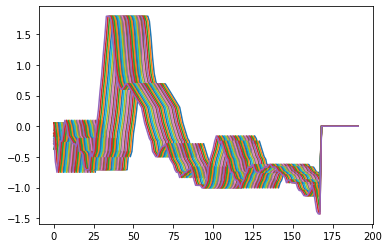

In [11]:
# now let's see how we can sample minibatches from our dataset that we can then pass to the model to train on
for i in range(25):
    # 192 x ['time', 'id']
    # NOTE: this is ubject id, not id_segment
    x = train_dataset[i]['inputs']
    # 192 x ['gl']
    y = train_dataset[i]['outputs']
    print(f'Example #{i}: x.shape={x.shape}, y.shape={y.shape}')
    plt.plot(x[:, 5])

In [12]:
#date = {
#    'year': [],
#    'month': [],
#    'day': [],
#    'hour': [],
#    'minute': []
#    }
#for datetime in df['time']:
#    date['year'].append(datetime.year)
#    date['month'].append(datetime.month)
#    date['day'].append(datetime.day)
#    date['hour'].append(datetime.hour)
#    date['minute'].append(datetime.minute)
## Create new columns
#df['year'] = date['year']
#df['month'] = date['month']
#df['day'] = date['day']
#df['hour'] = date['hour']
#df['minute'] = date['minute']
#df